In [198]:
# Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sn
# Importing the Dataset
dataset = pd.read_csv('indian_liver_patient.csv')

# Dividing the Dependent and Independent Variable's Columns
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 10].values

In [199]:
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [200]:
# Encoding the Categorical Variable

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])

# Dealing with Missing Values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, :])
X[:, :] = imputer.transform(X[:, :])

# Categorical Variables
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()


# Encoding the Dependent Variable

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


# Splitting the Dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


E:\kaustubh\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
E:\kaustubh\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
E:\kaustubh\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version

In [201]:
# Logistic Regression Classification

from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression()
classifier_logistic.fit(x_train, y_train)
y_pred_logistic = classifier_logistic.predict(x_test)

E:\kaustubh\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [202]:
# Importing the Confusion Matrix for checking of the classified data
# Confusion Matrix Class

from sklearn.metrics import confusion_matrix
cm_logistic = confusion_matrix(y_test,y_pred_logistic)

In [203]:
cm_logistic

array([[111,  11],
       [ 45,   8]], dtype=int64)

In [204]:
# KNN Classification

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier_knn.fit(x_train, y_train)
y_pred_knn = classifier_knn.predict(x_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

In [205]:
cm_knn

array([[98, 24],
       [38, 15]], dtype=int64)

In [206]:
# Support Vector Machines Classification

from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(x_train,y_train)
y_pred_svm = classifier_svm.predict(x_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

In [207]:
cm_svm

array([[122,   0],
       [ 53,   0]], dtype=int64)

In [208]:
# Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)
y_pred_nb = classifier_nb.predict(x_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

In [209]:
cm_nb

array([[47, 75],
       [ 0, 53]], dtype=int64)

In [247]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
classifier_dtree = DecisionTreeClassifier(criterion='gini')
classifier_dtree.fit(x_train, y_train)
y_pred_dtree = classifier_dtree.predict(x_test)
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
cm_dtree

array([[93, 29],
       [34, 19]], dtype=int64)

In [211]:
# Random Forest Classifications

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
classifier_rf = RandomForestClassifier(n_estimators=100)
classifier_rf.fit(x_train, y_train)
y_pred_rf = classifier_rf.predict(x_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[105,  17],
       [ 38,  15]], dtype=int64)

In [212]:
# Multilayer Perceptron Classification (Neural Network)

from sklearn.neural_network import MLPClassifier
classifier_mlp = MLPClassifier()
classifier_mlp.fit(x_train, y_train)
y_pred_mlp = classifier_mlp.predict(x_test)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_mlp

array([[89, 33],
       [18, 35]], dtype=int64)

In [213]:
# AdaBoost Classifier

classifier_adb = AdaBoostClassifier()
classifier_adb.fit(x_train, y_train)
y_pred_adb = classifier_adb.predict(x_test)
cm_adb = confusion_matrix(y_test, y_pred_adb)
cm_adb

array([[105,  17],
       [ 36,  17]], dtype=int64)

In [214]:
# Quadratic Discriminant Analysis Classifier

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier_qda = QuadraticDiscriminantAnalysis()
classifier_qda.fit(x_train, y_train)
y_pred_qda = classifier_qda.predict(x_test)
cm_qda = confusion_matrix(y_test, y_pred_qda)
cm_qda

E:\kaustubh\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
E:\kaustubh\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


array([[64, 58],
       [ 8, 45]], dtype=int64)

In [215]:
# Linear Discriminant Analysis Classifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier_lda = LinearDiscriminantAnalysis()
classifier_lda.fit(x_train, y_train)
y_pred_lda = classifier_qda.predict(x_test)
cm_lda = confusion_matrix(y_test, y_pred_qda)
cm_lda

E:\kaustubh\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([[64, 58],
       [ 8, 45]], dtype=int64)

In [216]:
# Stochastic Gradient Classifier

from sklearn.linear_model import SGDClassifier
classifier_sgd = SGDClassifier(max_iter=100,tol=10)
classifier_sgd.fit(x_train, y_train)
y_pred_sgd = classifier_sgd.predict(x_test)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
cm_sgd

array([[122,   0],
       [ 53,   0]], dtype=int64)

In [217]:
# Confusion Matrix of all Classifications

all_classification_results = [[cm_dtree, 'DTree'],[cm_sgd,'SGD'],[cm_qda,'QDA'],[cm_adb,'AdaBoost'],[cm_mlp, 'MLP'],[cm_logistic,'LGSTC'], [cm_knn,'KNN'], [cm_nb,'NB'], [cm_rf,'RF'], [cm_svm,'SVM']]

In [218]:
for i in all_classification_results:
    print(i)

[array([[95, 27],
       [33, 20]], dtype=int64), 'DTree']
[array([[122,   0],
       [ 53,   0]], dtype=int64), 'SGD']
[array([[64, 58],
       [ 8, 45]], dtype=int64), 'QDA']
[array([[105,  17],
       [ 36,  17]], dtype=int64), 'AdaBoost']
[array([[89, 33],
       [18, 35]], dtype=int64), 'MLP']
[array([[111,  11],
       [ 45,   8]], dtype=int64), 'LGSTC']
[array([[98, 24],
       [38, 15]], dtype=int64), 'KNN']
[array([[47, 75],
       [ 0, 53]], dtype=int64), 'NB']
[array([[105,  17],
       [ 38,  15]], dtype=int64), 'RF']
[array([[122,   0],
       [ 53,   0]], dtype=int64), 'SVM']


In [248]:
# Calculating Accuracy in all the classifiers
# In Percentage 
from sklearn.metrics import accuracy_score as acc

classifier_accuracy = [['Logistic Regression',acc(y_test, y_pred_logistic,normalize=True)*100],
       ['Quadratic Discriminant Analysis',acc(y_test, y_pred_qda,normalize=True)*100],
        ['Linear Disriminant Analysis',acc(y_test,y_pred_lda,normalize=True)*100],
       ['Naive Bayes',acc(y_test, y_pred_nb,normalize=True)*100],
       ['K-Nearest Neighbors',acc(y_test, y_pred_knn,normalize=True)*100],
       ['MLP Classifier',acc(y_test, y_pred_mlp,normalize=True)*100],
       ['SGD Classifier',acc(y_test, y_pred_sgd,normalize=True)*100],
       ['Adaboost Classifier',acc(y_test, y_pred_adb,normalize=True)*100],
       ['Random Forest',acc(y_test, y_pred_rf,normalize=True)*100],
       ['SVM Classifier',acc(y_test, y_pred_svm,normalize=True)*100],
       ['Decision Tree Classifier',acc(y_test, y_pred_dtree,normalize=True)*100]]

In [246]:
classifier_accuracy

[['Logistic Regression', 68.0],
 ['Quadratic Discriminant Analysis', 62.28571428571429],
 ['Linear Disriminant Analysis', 62.28571428571429],
 ['Naive Bayes', 57.14285714285714],
 ['K-Nearest Neighbors', 64.57142857142857],
 ['MLP Classifier', 70.85714285714285],
 ['SGD Classifier', 69.71428571428572],
 ['Adaboost Classifier', 69.71428571428572],
 ['Random Forest', 68.57142857142857],
 ['SVM Classifier', 69.71428571428572],
 ['Decision Tree Classifier', 65.71428571428571]]

In [221]:
labels = ['LR','QDA','LDA','NB','KNN','MLP','SGD','ADB','RF','SVM','DTree']
labels

['LR', 'QDA', 'LDA', 'NB', 'KNN', 'MLP', 'SGD', 'ADB', 'RF', 'SVM', 'DTree']

In [222]:
classifier_accuracy[0][1]

68.0

In [223]:
classifier_accuracy[1][1]

62.28571428571429

In [224]:
# Two Ways to convert the list element into series element
# Here accuracy = ac
acc_arr=[]
for i in range(len(classifier_accuracy)):
    acc_arr.append(classifier_accuracy[i][1])

In [225]:
accuracy = pd.Series(acc_arr)
ac = pd.Series(classifier_accuracy[i][1] for i in range(len(classifier_accuracy)))

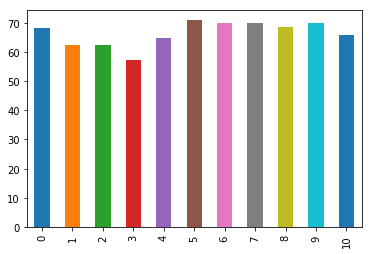

In [226]:
ac.plot(kind='bar')

In [227]:
ac

0     68.000000
1     62.285714
2     62.285714
3     57.142857
4     64.571429
5     70.857143
6     69.714286
7     69.714286
8     68.571429
9     69.714286
10    65.714286
dtype: float64

In [236]:
c = ['red','blue','black','magenta','yellow','cyan','orange','indigo','purple','green','violet']

Text(0,0.5,'Accuracy(%)')

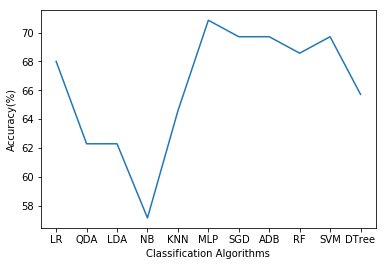

In [237]:
fig = plt.figure()
ax = fig.add_subplot(111)
X, Y = ac,labels
ax.plot(Y, X)
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy(%)')

Text(0,0.5,'Accuracy(%)')

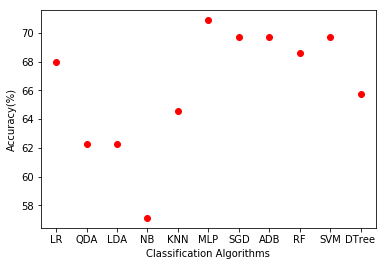

In [238]:
plt.scatter(Y,X,color='red')
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy(%)')

Text(0,0.5,'Accuracy(%)')

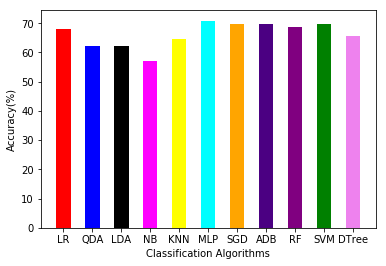

In [239]:
plt.bar(Y,X,color=c,width=0.5)
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy(%)')